In [125]:
# Reference: https://plantcv.readthedocs.io/en/stable/vis_tutorial/
# Import required packages

import cv2
import numpy as np
import matplotlib.pyplot as plt
from plantcv import plantcv as pcv
pcv.params.debug = "plot"

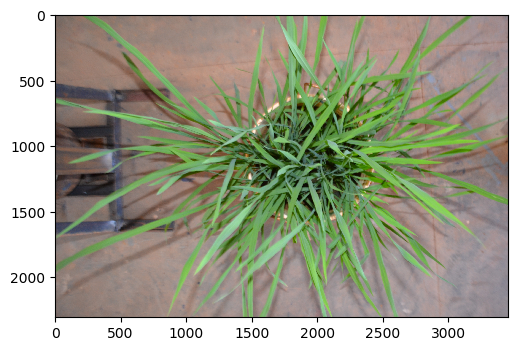

In [157]:
# Load image

img, path, filename = pcv.readimage(filename='/media/shadowsaint/New Volume/1. RVCE/7th Sem/5. CV/Images/DSC_0004.JPG', mode='rgb')

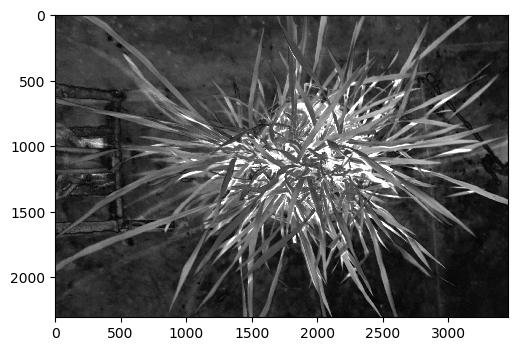

In [158]:
# RGB to HSV (Hue, Saturation, Value)

s = pcv.rgb2gray_hsv(rgb_img=img, channel='s')

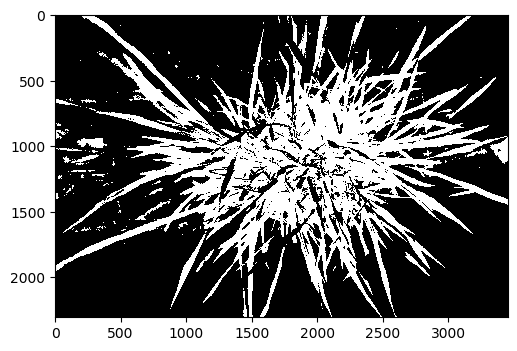

In [159]:
# Binary thresholding (to extract saturated parts)

s_thresh = pcv.threshold.binary(gray_img=s, threshold=85, max_value=255, object_type='light')

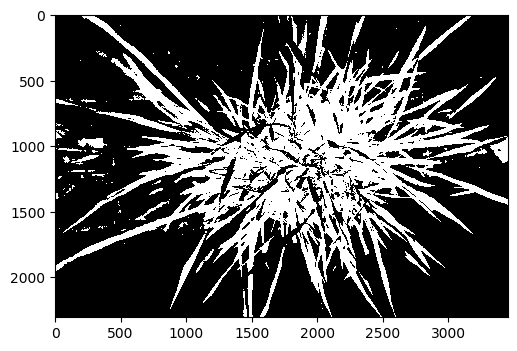

In [160]:
# Median blur (to remove background noise)

s_mblur = pcv.median_blur(gray_img=s_thresh, ksize=5)

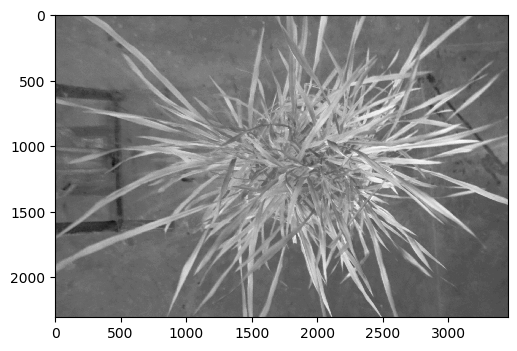

In [161]:
# RGB to LAB (Lightness, Red/Green, Blue/Yellow)

b = pcv.rgb2gray_lab(rgb_img=img, channel='b')

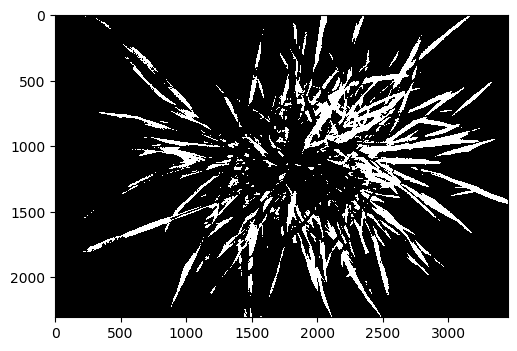

In [162]:
# Binary threshold (to extract blue/yellow parts)

b_thresh = pcv.threshold.binary(gray_img=b, threshold=160, max_value=255, object_type='light')

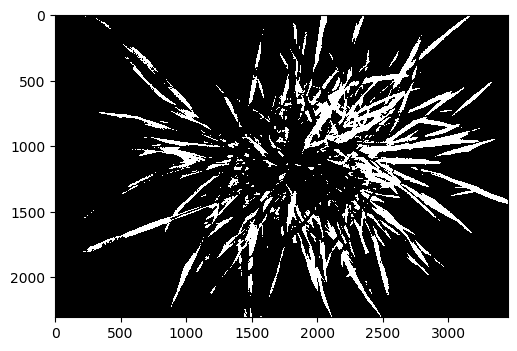

In [163]:
b_cnt = pcv.threshold.binary(gray_img=b, threshold=160, max_value=255, object_type='light')

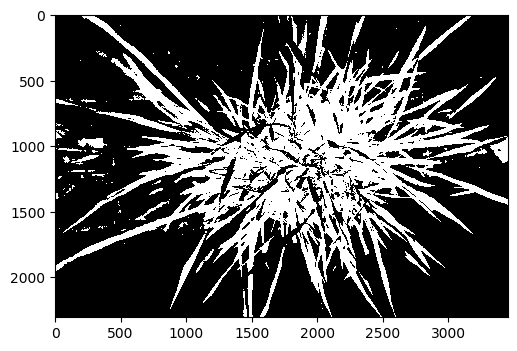

In [164]:
# Apply this image as a mask on the original image

bs = pcv.logical_or(bin_img1=s_mblur, bin_img2=b_cnt)

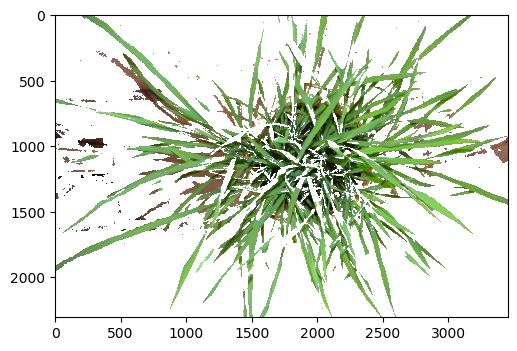

In [165]:
# Join the binary images using logical OR

masked = pcv.apply_mask(rgb_img=img, mask=bs, mask_color='white')

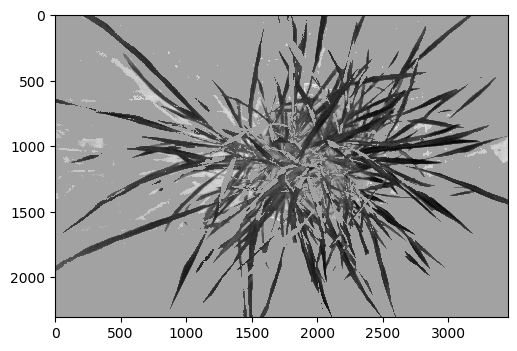

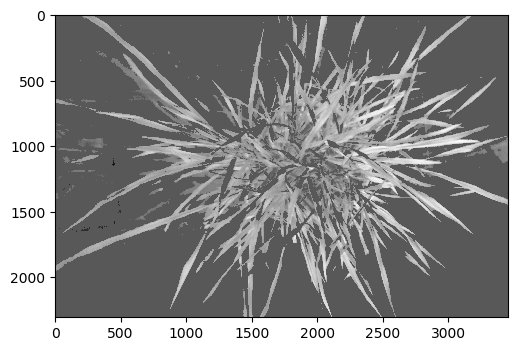

In [166]:
# Convert RGB to LAB and extract the Green-Magenta and Blue-Yellow channels

masked_a = pcv.rgb2gray_lab(rgb_img=masked, channel='a')
masked_b = pcv.rgb2gray_lab(rgb_img=masked, channel='b')

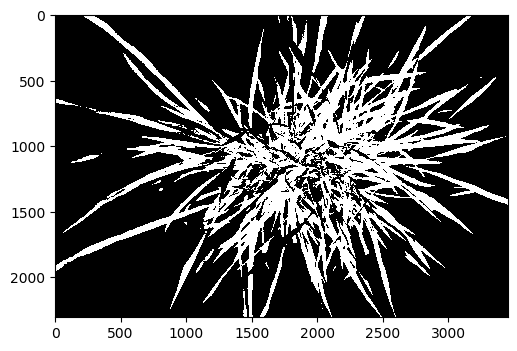

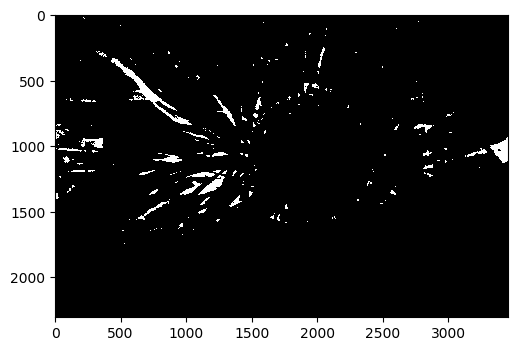

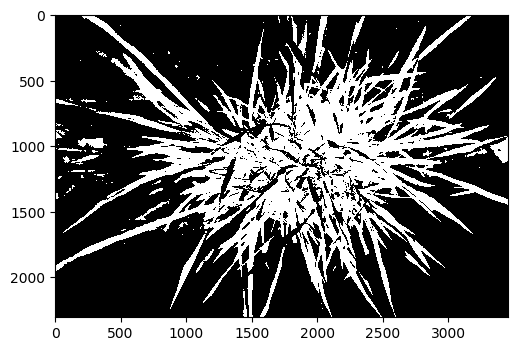

In [167]:
# Threshold the green-magenta and blue images

maskeda_thresh = pcv.threshold.binary(gray_img=masked_a, threshold=115, max_value=255, object_type='dark')
maskeda_thresh1 = pcv.threshold.binary(gray_img=masked_a, threshold=135, max_value=255, object_type='light')
maskedb_thresh = pcv.threshold.binary(gray_img=masked_b, threshold=128, max_value=255, object_type='light')

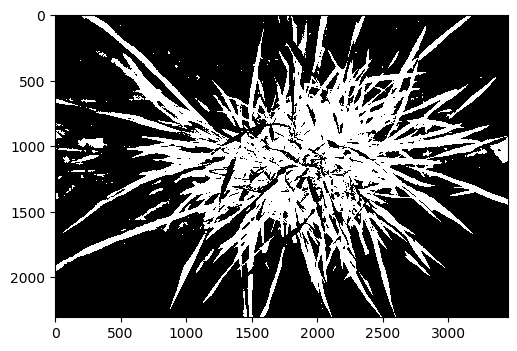

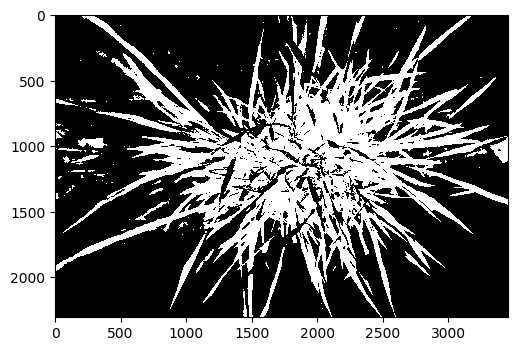

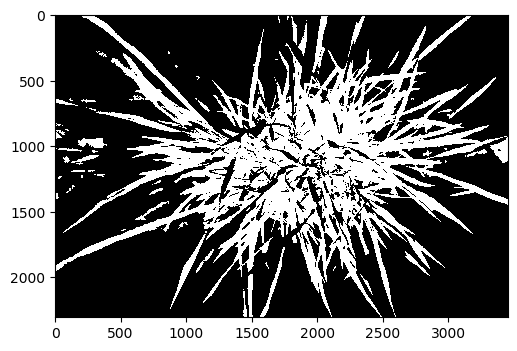

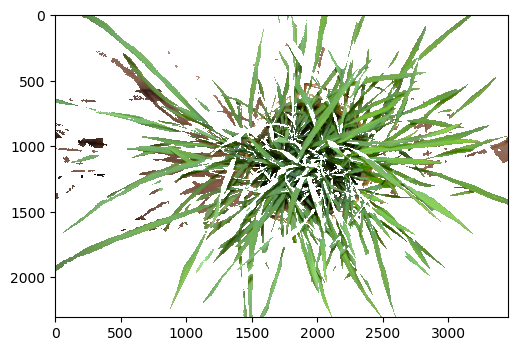

In [168]:
# Join the thresholded saturation and blue-yellow images (OR)

ab1 = pcv.logical_or(bin_img1=maskeda_thresh, bin_img2=maskedb_thresh)
ab = pcv.logical_or(bin_img1=maskeda_thresh1, bin_img2=ab1)

# Fill small objects

ab_fill = pcv.fill(bin_img=ab, size=200)

# Apply mask

masked2 = pcv.apply_mask(rgb_img=masked, mask=ab_fill, mask_color='white')

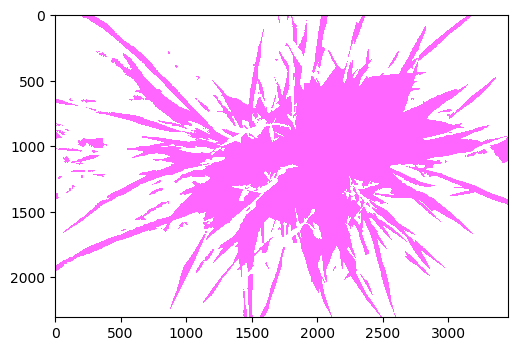

In [169]:
# Identify contours in the image

id_objects, obj_hierarchy = pcv.find_objects(masked2, ab_fill)

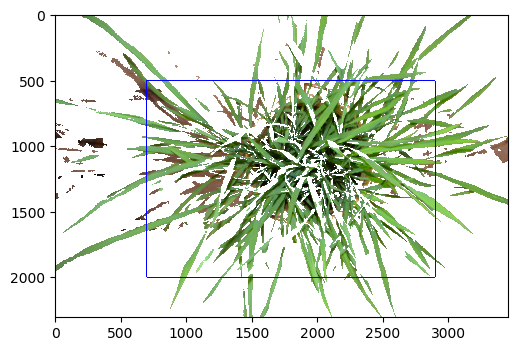

In [174]:
# Establish a rectangular region of interest

roi1, roi_hierarchy= pcv.roi.rectangle(img=masked2, x=700, y=500, h=1500, w=2200)

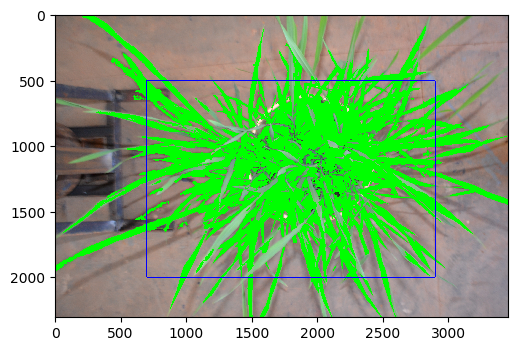

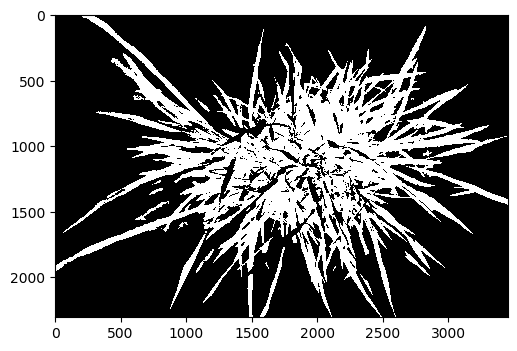

In [175]:
# Colour everything overlapping that region

roi_objects, hierarchy3, kept_mask, obj_area = pcv.roi_objects(img=img, roi_contour=roi1,
                                                                   roi_hierarchy=roi_hierarchy, 
                                                                   object_contour=id_objects, 
                                                                   obj_hierarchy=obj_hierarchy,
                                                                   roi_type='partial')

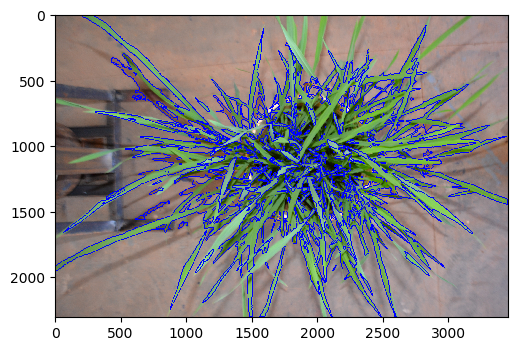

In [176]:
# Draw an outline on combined objects

obj, mask = pcv.object_composition(img=img, contours=roi_objects, hierarchy=hierarchy3)

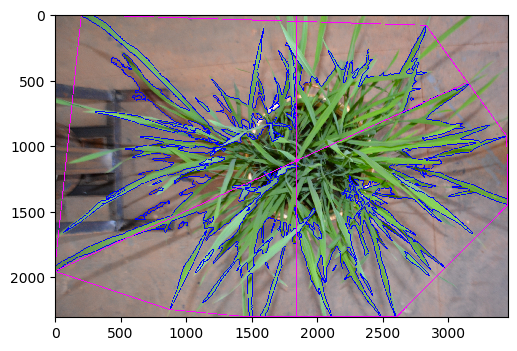

In [177]:
# Draw shape of the plant

shape_img = pcv.analyze_object(img=img, obj=obj, mask=maskedb_thresh)

/home/shadowsaint/anaconda3/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/shadowsaint/anaconda3/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


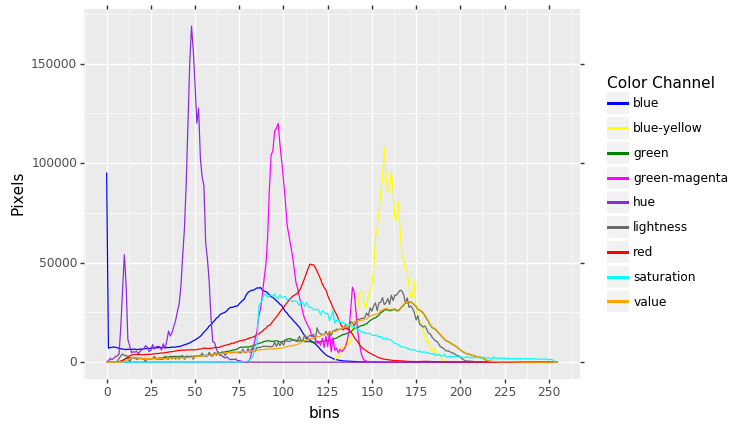

<ggplot: (8739973797829)>


In [178]:
# Plot histogram

color_histogram = pcv.analyze_color(rgb_img=img, mask=maskedb_thresh, hist_plot_type='all')

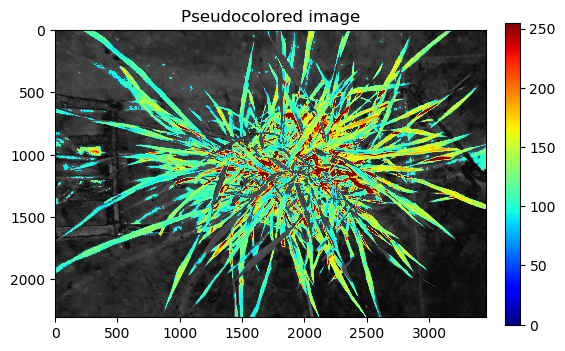

In [179]:
# Pseudocolor the grayscale image

pseudocolored_img = pcv.visualize.pseudocolor(gray_img=s, mask=maskedb_thresh, cmap='jet')

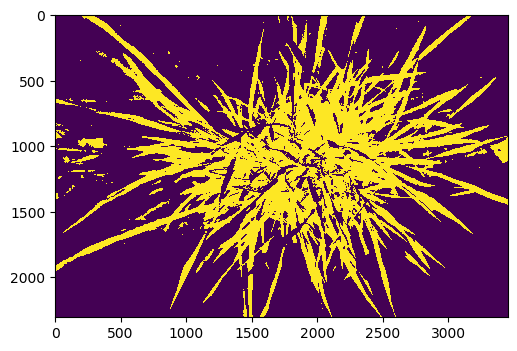

In [180]:
plt.imshow(maskedb_thresh)

In [181]:
# Calculate the percentage of plant area in the image

bs = maskedb_thresh

count = 0
white = 0
black = 0
for i in bs:
    for j in i:
        count += 1
        if j == 255:
            white += 1
        elif j == 0:
            black += 1
print("Percentage of plant in the image is: ",white/(bs.shape[0]*bs.shape[1]) * 100)

Percentage of plant in the image is:  27.755963360821763
